# **Bienvenidos al segundo desafío CHALLENGE ALURA - G9 by Herny Ferrer**

### Importación de datos



In [104]:
import pandas as pd

# Cargar datos
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

dfs = [pd.read_csv(url) for url in urls]
tiendas = pd.concat(dfs, ignore_index=True)
tiendas['Fecha de Compra'] = pd.to_datetime(tiendas['Fecha de Compra'], dayfirst=True)
tiendas.head()

Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      2021-01-16      Pedro Gomez          Bogotá             4   
1      2022-05-18  Beatriz Morales        Medellín             1   
2      2021-03-15   Juan Fernandez       Cartagena             1   
3      2022-05-03   Juan Fernandez            Cali             4   
4      2020-11-07    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de crédito                   4   6.25184 -75.56359  
2  Tarjeta de crédito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

### Complementos



In [105]:
#Importante ejecutar

import matplotlib.pyplot as plt
plt.show()

#1. Análisis de facturación



## ***Facturación por lugar***


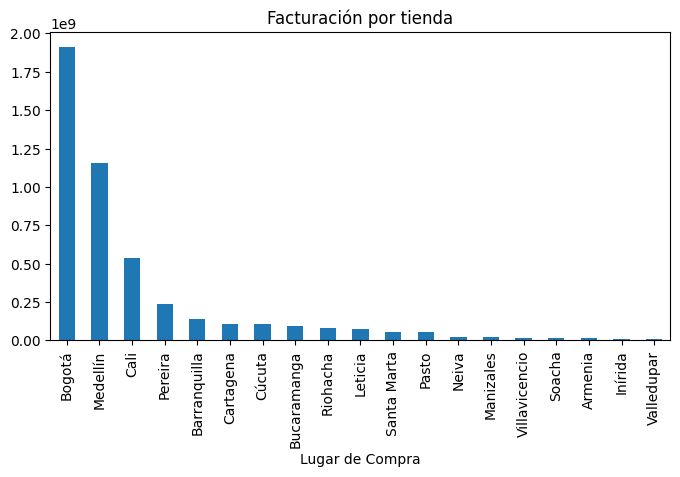

In [106]:
tiendas['Total'] = tiendas['Precio'] + tiendas['Costo de envío']
facturacion_tienda = tiendas.groupby('Lugar de Compra')['Total'].sum().sort_values(ascending=False)

facturacion_tienda.plot(kind='bar', figsize=(8,4), title='Facturación por tienda')
plt.show()



## ***Facturación mensual por lugar***


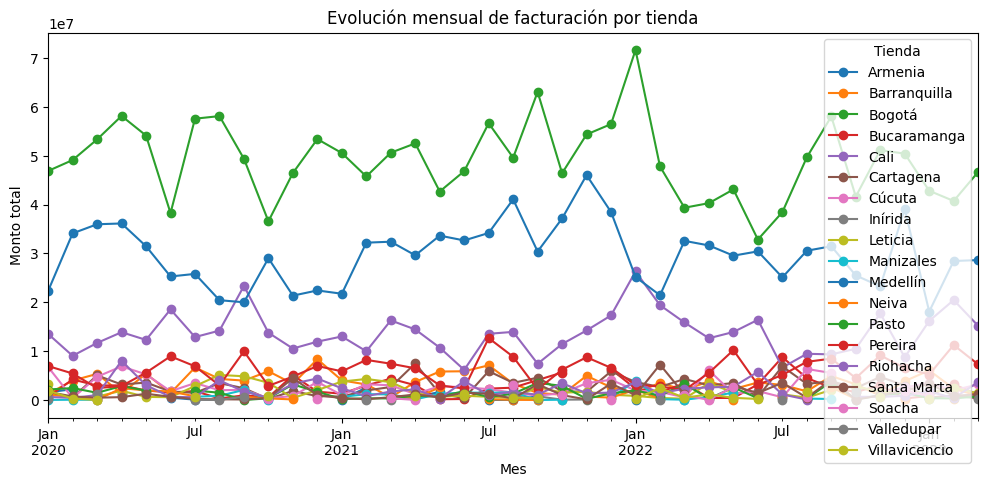

In [107]:
tiendas['Mes'] = pd.to_datetime(tiendas['Fecha de Compra']).dt.to_period('M')
facturacion_mensual_tienda = tiendas.groupby(['Mes', 'Lugar de Compra'])['Total'].sum().unstack()

facturacion_mensual_tienda.plot(figsize=(12,5), marker='o')
plt.title('Evolución mensual de facturación por tienda')
plt.ylabel('Monto total')
plt.legend(title='Tienda')
plt.show()



## ***Participación de mercado (%)***


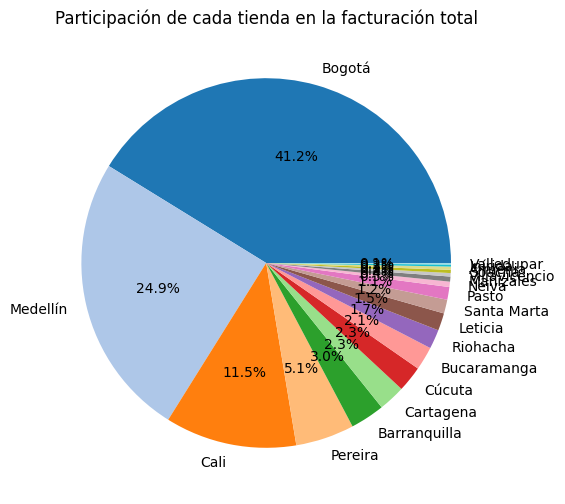

In [108]:
participacion = (facturacion_tienda / facturacion_tienda.sum() * 100).round(2)
participacion.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colormap='tab20', ylabel='')
plt.title('Participación de cada tienda en la facturación total')
plt.show()


## ***Facturación total por método de pago***


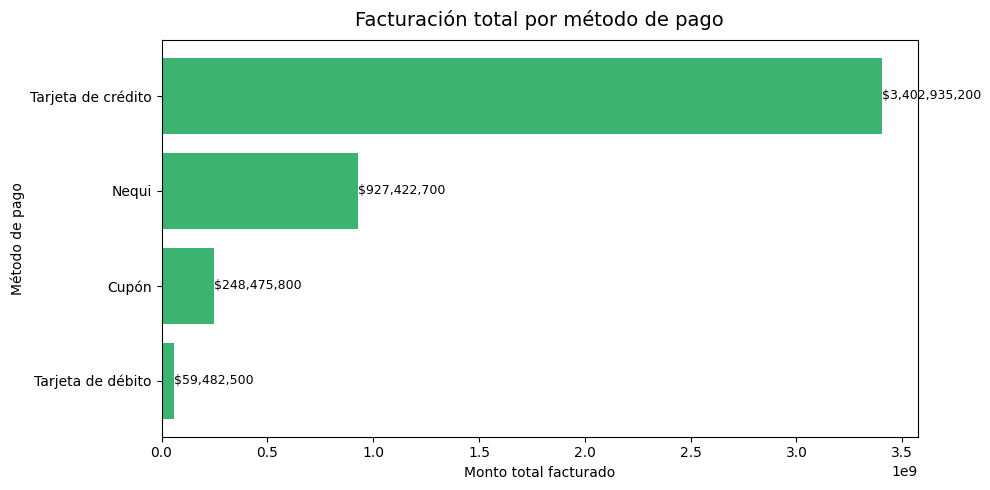

In [109]:
import matplotlib.pyplot as plt

facturacion_pago = tiendas.groupby('Método de pago')['Total'].sum().sort_values(ascending=False)
facturacion_pago


plt.figure(figsize=(10,5))
bars = plt.barh(facturacion_pago.index, facturacion_pago.values, color='mediumseagreen')

plt.title('Facturación total por método de pago', fontsize=14, pad=10)
plt.xlabel('Monto total facturado')
plt.ylabel('Método de pago')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 2000, bar.get_y() + bar.get_height()/2,
             f"${bar.get_width():,.0f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()



# 2. Ventas por categoría

## ***Categoría que genera más ingresos o tiene más ventas***

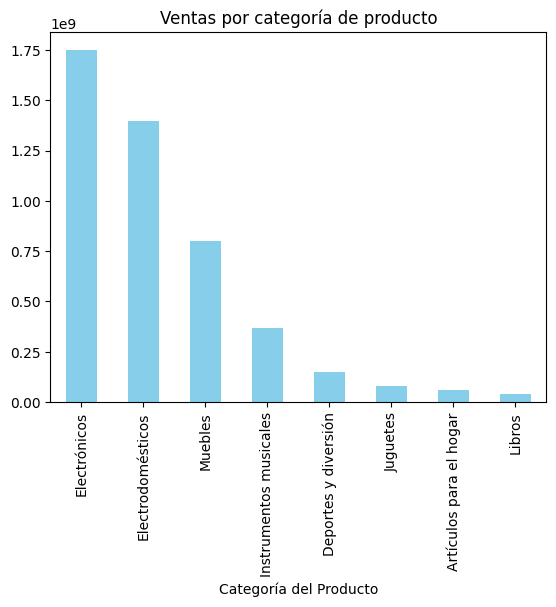

In [110]:
ventas_categoria = tiendas.groupby('Categoría del Producto')['Total'].sum().sort_values(ascending=False)

ventas_categoria.plot(kind='bar', color='skyblue', title='Ventas por categoría de producto')
plt.show()


# 3. Calificación promedio de la tienda


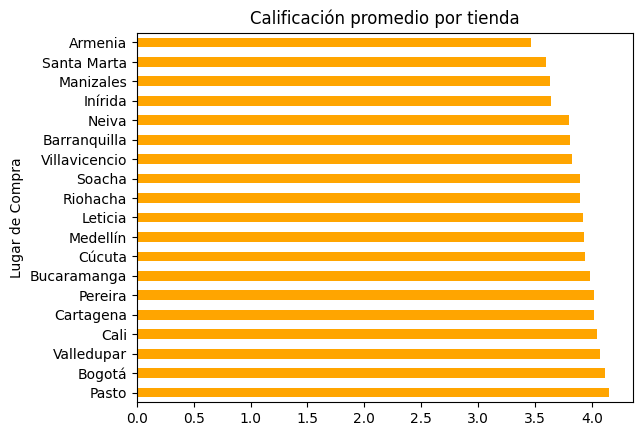

In [111]:
calificacion = tiendas.groupby('Lugar de Compra')['Calificación'].mean().sort_values(ascending=False)
calificacion.plot(kind='barh', color='orange', title='Calificación promedio por tienda')
plt.show()


# 4. Productos más y menos vendidos

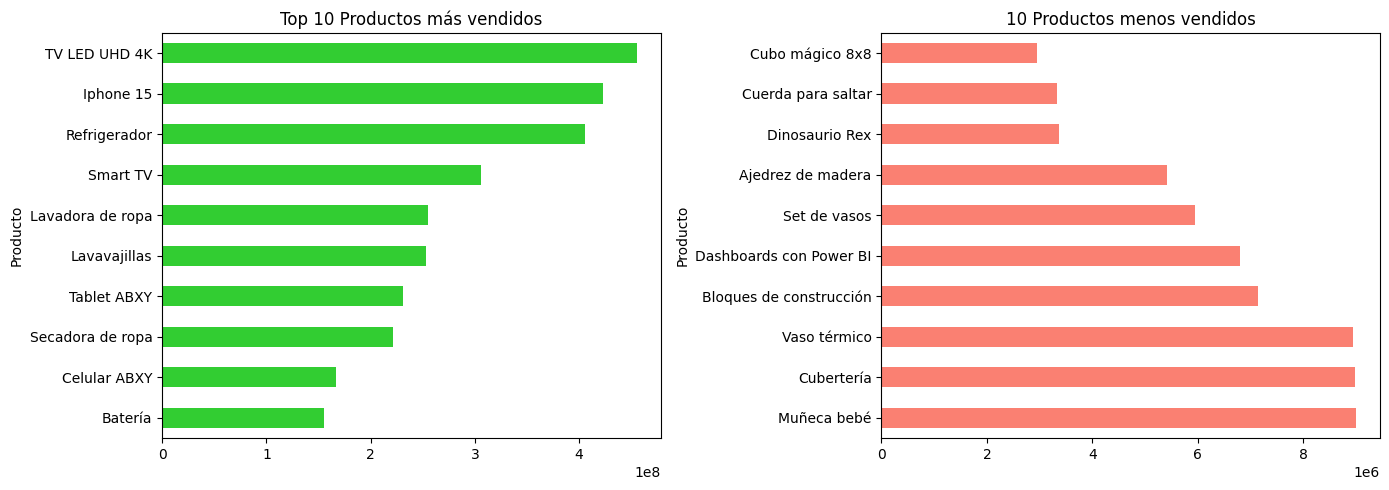

In [112]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14,5))


productos_top.plot(kind='barh', color='limegreen', ax=ax[0])
ax[0].set_title('Top 10 Productos más vendidos')
ax[0].invert_yaxis()

productos_bottom.plot(kind='barh', color='salmon', ax=ax[1])
ax[1].set_title('10 Productos menos vendidos')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()




# 5. Envío promedio por tienda

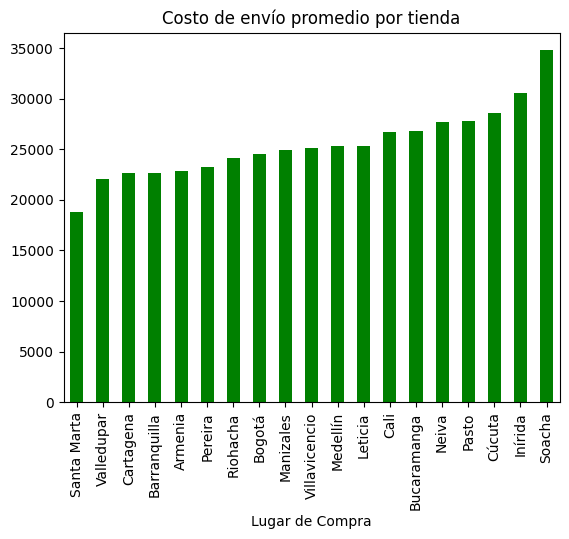

In [113]:
envio_promedio = tiendas.groupby('Lugar de Compra')['Costo de envío'].mean().sort_values()
envio_promedio.plot(kind='bar', color='green', title='Costo de envío promedio por tienda')
plt.show()



# 5. Mapa de ventas



In [114]:
import folium #Atención! Esta consulta puede demorar un poco, pacienca por favor. :)
mapa = folium.Map(location=[tiendas['lat'].mean(), tiendas['lon'].mean()], zoom_start=6)
for _, fila in tiendas.iterrows():
    folium.CircleMarker(location=[fila['lat'], fila['lon']], radius=4, color='blue').add_to(mapa)

mapa


